# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 18.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 16.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 29.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 4.1 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [4]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [6]:
client = MongoClient(mongod_connect)
db = client.gp23 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [7]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [8]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [9]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1325338899103817728
1325338899317600256
1325338899334504448
1325338899498094593
1325338899334508544
1325338899456012288
1325338899640705024
1325338899846107136
1325338899929944064
1325338899988799488
1325338900047388672
1325338900215205894
1325338900286631937
1325338900575866880
1325338900039041024
1325338900651520001
1325338900882206721
1325338900810756097
1325338900827676672
1325338901116981248
1325338901238657029
1325338901431480320
1325338901674913792
1325338901611995136
1325338901750439936
1325338901981122561
1325338902127910923
1325338902090055680
1325338902186487808
1325338902832455680
1325338902778032129
1325338903184896000
1325338903360892928
1325338903453159429
1325338903532855296
1325338903625277440
1325338903700631552
1325338903725842434
1325338903734259712
1325338903897808899
1325338903990071296
1325338904086671360
1325338904182943745
1325338904095035392
1325338904237666305
1325338904396926976
1325338904409464832
1325338904627617792
1325338904443064323
1325338904644395009


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [13]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 08 07:45:56 +0000 2020'
'Sun Nov 08 07:35:36 +0000 2020'
'Sun Nov 08 07:25:25 +0000 2020'
'Sun Nov 08 07:19:14 +0000 2020'
'Sun Nov 08 07:15:21 +0000 2020'
'Sun Nov 08 07:15:19 +0000 2020'
'Sun Nov 08 07:13:12 +0000 2020'
'Sun Nov 08 07:11:07 +0000 2020'
'Sun Nov 08 07:08:40 +0000 2020'
'Sun Nov 08 07:08:17 +0000 2020'
'Sun Nov 08 07:08:03 +0000 2020'
'Sun Nov 08 07:02:35 +0000 2020'
'Sun Nov 08 07:02:26 +0000 2020'
'Sun Nov 08 07:00:28 +0000 2020'
'Sun Nov 08 07:00:27 +0000 2020'
'Sun Nov 08 06:59:53 +0000 2020'
'Sun Nov 08 06:59:33 +0000 2020'
'Sun Nov 08 06:59:09 +0000 2020'
'Sun Nov 08 06:57:11 +0000 2020'
'Sun Nov 08 06:52:15 +0000 2020'
'Sun Nov 08 06:50:57 +0000 2020'
'Sun Nov 08 06:49:53 +0000 2020'
'Sun Nov 08 06:39:26 +0000 2020'
'Sun Nov 08 06:37:59 +0000 2020'
'Sun Nov 08 06:37:34 +0000 2020'
'Sun Nov 08 06:37:20 +0000 2020'
'Sun Nov 08 06:37:16 +0000 2020'
'Sun Nov 08 06:36:47 +0000 2020'
'Sun Nov 08 06:36:17 +0000 2020'
'Sun Nov 08 06:34:15 +0000 2020'
'Sun Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [14]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 08 06:00:22 +0000 2020'
'Sun Nov 08 05:54:17 +0000 2020'
'Sun Nov 08 05:53:19 +0000 2020'
'Sun Nov 08 05:51:38 +0000 2020'
'Sun Nov 08 05:50:43 +0000 2020'
'Sun Nov 08 05:50:28 +0000 2020'
'Sun Nov 08 05:50:01 +0000 2020'
'Sun Nov 08 05:49:43 +0000 2020'
'Sun Nov 08 05:46:11 +0000 2020'
'Sun Nov 08 05:43:44 +0000 2020'
'Sun Nov 08 05:43:41 +0000 2020'
'Sun Nov 08 05:43:07 +0000 2020'
'Sun Nov 08 05:42:14 +0000 2020'
'Sun Nov 08 05:42:01 +0000 2020'
'Sun Nov 08 05:40:22 +0000 2020'
'Sun Nov 08 05:39:10 +0000 2020'
'Sun Nov 08 05:38:38 +0000 2020'
'Sun Nov 08 05:37:06 +0000 2020'
'Sun Nov 08 05:37:01 +0000 2020'
'Sun Nov 08 05:36:33 +0000 2020'
'Sun Nov 08 05:36:32 +0000 2020'
'Sun Nov 08 05:35:56 +0000 2020'
'Sun Nov 08 05:35:52 +0000 2020'
'Sun Nov 08 05:34:10 +0000 2020'
'Sun Nov 08 05:34:02 +0000 2020'
'Sun Nov 08 05:33:30 +0000 2020'
'Sun Nov 08 05:33:29 +0000 2020'
'Sun Nov 08 05:31:15 +0000 2020'
'Sun Nov 08 05:29:45 +0000 2020'
'Sun Nov 08 05:28:15 +0000 2020'
'Sun Nov 0

'Sun Nov 08 01:23:26 +0000 2020'
'Sun Nov 08 01:22:22 +0000 2020'
'Sun Nov 08 01:21:09 +0000 2020'
'Sun Nov 08 01:19:32 +0000 2020'
'Sun Nov 08 01:18:24 +0000 2020'
'Sun Nov 08 01:16:49 +0000 2020'
'Sun Nov 08 01:16:24 +0000 2020'
'Sun Nov 08 01:15:26 +0000 2020'
'Sun Nov 08 01:15:21 +0000 2020'
'Sun Nov 08 01:15:14 +0000 2020'
'Sun Nov 08 01:14:25 +0000 2020'
'Sun Nov 08 01:13:09 +0000 2020'
'Sun Nov 08 01:12:39 +0000 2020'
'Sun Nov 08 01:12:23 +0000 2020'
'Sun Nov 08 01:11:34 +0000 2020'
'Sun Nov 08 01:10:26 +0000 2020'
'Sun Nov 08 01:10:15 +0000 2020'
'Sun Nov 08 01:08:40 +0000 2020'
'Sun Nov 08 01:08:16 +0000 2020'
'Sun Nov 08 01:08:03 +0000 2020'
'Sun Nov 08 01:07:21 +0000 2020'
'Sun Nov 08 01:06:25 +0000 2020'
'Sun Nov 08 01:05:21 +0000 2020'
'Sun Nov 08 01:05:16 +0000 2020'
'Sun Nov 08 01:04:51 +0000 2020'
'Sun Nov 08 01:04:01 +0000 2020'
'Sun Nov 08 01:03:52 +0000 2020'
'Sun Nov 08 01:03:18 +0000 2020'
'Sun Nov 08 01:03:12 +0000 2020'
'Sun Nov 08 01:01:49 +0000 2020'
'Sun Nov 0

'Sat Nov 07 22:07:40 +0000 2020'
'Sat Nov 07 22:06:48 +0000 2020'
'Sat Nov 07 22:06:03 +0000 2020'
'Sat Nov 07 22:05:45 +0000 2020'
'Sat Nov 07 22:05:22 +0000 2020'
'Sat Nov 07 22:05:10 +0000 2020'
'Sat Nov 07 22:03:59 +0000 2020'
'Sat Nov 07 22:03:16 +0000 2020'
'Sat Nov 07 22:01:58 +0000 2020'
'Sat Nov 07 22:00:48 +0000 2020'
'Sat Nov 07 21:59:41 +0000 2020'
'Sat Nov 07 21:59:10 +0000 2020'
'Sat Nov 07 21:58:16 +0000 2020'
'Sat Nov 07 21:58:09 +0000 2020'
'Sat Nov 07 21:58:01 +0000 2020'
'Sat Nov 07 21:57:18 +0000 2020'
'Sat Nov 07 21:56:22 +0000 2020'
'Sat Nov 07 21:55:31 +0000 2020'
'Sat Nov 07 21:54:57 +0000 2020'
'Sat Nov 07 21:54:12 +0000 2020'
'Sat Nov 07 21:54:10 +0000 2020'
'Sat Nov 07 21:52:31 +0000 2020'
'Sat Nov 07 21:52:02 +0000 2020'
'Sat Nov 07 21:51:54 +0000 2020'
'Sat Nov 07 21:51:53 +0000 2020'
'Sat Nov 07 21:51:20 +0000 2020'
'Sat Nov 07 21:50:02 +0000 2020'
'Sat Nov 07 21:49:13 +0000 2020'
'Sat Nov 07 21:47:30 +0000 2020'
'Sat Nov 07 21:47:08 +0000 2020'
'Sat Nov 0

'Sat Nov 07 19:29:52 +0000 2020'
'Sat Nov 07 19:29:24 +0000 2020'
'Sat Nov 07 19:29:02 +0000 2020'
'Sat Nov 07 19:28:42 +0000 2020'
'Sat Nov 07 19:28:41 +0000 2020'
'Sat Nov 07 19:28:36 +0000 2020'
'Sat Nov 07 19:28:09 +0000 2020'
'Sat Nov 07 19:27:53 +0000 2020'
'Sat Nov 07 19:27:46 +0000 2020'
'Sat Nov 07 19:27:32 +0000 2020'
'Sat Nov 07 19:27:09 +0000 2020'
'Sat Nov 07 19:25:48 +0000 2020'
'Sat Nov 07 19:25:40 +0000 2020'
'Sat Nov 07 19:25:20 +0000 2020'
'Sat Nov 07 19:25:10 +0000 2020'
'Sat Nov 07 19:25:03 +0000 2020'
'Sat Nov 07 19:24:49 +0000 2020'
'Sat Nov 07 19:24:33 +0000 2020'
'Sat Nov 07 19:24:20 +0000 2020'
'Sat Nov 07 19:24:15 +0000 2020'
'Sat Nov 07 19:23:55 +0000 2020'
'Sat Nov 07 19:23:51 +0000 2020'
'Sat Nov 07 19:23:11 +0000 2020'
'Sat Nov 07 19:22:14 +0000 2020'
'Sat Nov 07 19:21:34 +0000 2020'
'Sat Nov 07 19:21:22 +0000 2020'
'Sat Nov 07 19:21:16 +0000 2020'
'Sat Nov 07 19:20:47 +0000 2020'
'Sat Nov 07 19:20:24 +0000 2020'
'Sat Nov 07 19:19:40 +0000 2020'
'Sat Nov 0

'Sat Nov 07 17:46:13 +0000 2020'
'Sat Nov 07 17:45:44 +0000 2020'
'Sat Nov 07 17:45:15 +0000 2020'
'Sat Nov 07 17:45:00 +0000 2020'
'Sat Nov 07 17:44:30 +0000 2020'
'Sat Nov 07 17:44:02 +0000 2020'
'Sat Nov 07 17:43:54 +0000 2020'
'Sat Nov 07 17:43:49 +0000 2020'
'Sat Nov 07 17:43:19 +0000 2020'
'Sat Nov 07 17:43:16 +0000 2020'
'Sat Nov 07 17:42:47 +0000 2020'
'Sat Nov 07 17:42:46 +0000 2020'
'Sat Nov 07 17:42:44 +0000 2020'
'Sat Nov 07 17:42:34 +0000 2020'
'Sat Nov 07 17:42:22 +0000 2020'
'Sat Nov 07 17:42:13 +0000 2020'
'Sat Nov 07 17:42:12 +0000 2020'
'Sat Nov 07 17:42:02 +0000 2020'
'Sat Nov 07 17:41:30 +0000 2020'
'Sat Nov 07 17:41:20 +0000 2020'
'Sat Nov 07 17:39:41 +0000 2020'
'Sat Nov 07 17:39:39 +0000 2020'
'Sat Nov 07 17:39:19 +0000 2020'
'Sat Nov 07 17:39:17 +0000 2020'
'Sat Nov 07 17:39:12 +0000 2020'
'Sat Nov 07 17:38:57 +0000 2020'
'Sat Nov 07 17:38:56 +0000 2020'
'Sat Nov 07 17:38:39 +0000 2020'
'Sat Nov 07 17:38:09 +0000 2020'
'Sat Nov 07 17:37:44 +0000 2020'
'Sat Nov 0

'Sat Nov 07 16:38:39 +0000 2020'
'Sat Nov 07 16:38:34 +0000 2020'
'Sat Nov 07 16:38:32 +0000 2020'
'Sat Nov 07 16:38:18 +0000 2020'
'Sat Nov 07 16:38:03 +0000 2020'
'Sat Nov 07 16:37:28 +0000 2020'
'Sat Nov 07 16:37:19 +0000 2020'
'Sat Nov 07 16:36:56 +0000 2020'
'Sat Nov 07 16:36:19 +0000 2020'
'Sat Nov 07 16:36:00 +0000 2020'
'Sat Nov 07 16:35:40 +0000 2020'
'Sat Nov 07 16:35:05 +0000 2020'
'Sat Nov 07 16:35:04 +0000 2020'
'Sat Nov 07 16:35:04 +0000 2020'
'Sat Nov 07 16:34:46 +0000 2020'
'Sat Nov 07 16:34:46 +0000 2020'
'Sat Nov 07 16:34:44 +0000 2020'
'Sat Nov 07 16:34:32 +0000 2020'
'Sat Nov 07 16:34:30 +0000 2020'
'Sat Nov 07 16:34:18 +0000 2020'
'Sat Nov 07 16:34:15 +0000 2020'
'Sat Nov 07 16:34:10 +0000 2020'
'Sat Nov 07 16:33:48 +0000 2020'
'Sat Nov 07 16:33:33 +0000 2020'
'Sat Nov 07 16:33:27 +0000 2020'
'Sat Nov 07 16:33:04 +0000 2020'
'Sat Nov 07 16:32:11 +0000 2020'
'Sat Nov 07 16:32:10 +0000 2020'
'Sat Nov 07 16:31:55 +0000 2020'
'Sat Nov 07 16:31:36 +0000 2020'
'Sat Nov 0

'Sat Nov 07 14:22:12 +0000 2020'
'Sat Nov 07 14:21:52 +0000 2020'
'Sat Nov 07 14:21:34 +0000 2020'
'Sat Nov 07 14:20:21 +0000 2020'
'Sat Nov 07 14:19:38 +0000 2020'
'Sat Nov 07 14:19:22 +0000 2020'
'Sat Nov 07 14:19:10 +0000 2020'
'Sat Nov 07 14:18:38 +0000 2020'
'Sat Nov 07 14:18:12 +0000 2020'
'Sat Nov 07 14:18:05 +0000 2020'
'Sat Nov 07 14:17:08 +0000 2020'
'Sat Nov 07 14:17:06 +0000 2020'
'Sat Nov 07 14:16:43 +0000 2020'
'Sat Nov 07 14:16:14 +0000 2020'
'Sat Nov 07 14:15:03 +0000 2020'
'Sat Nov 07 14:14:30 +0000 2020'
'Sat Nov 07 14:14:30 +0000 2020'
'Sat Nov 07 14:14:29 +0000 2020'
'Sat Nov 07 14:10:52 +0000 2020'
'Sat Nov 07 14:09:46 +0000 2020'
'Sat Nov 07 14:09:29 +0000 2020'
'Sat Nov 07 14:09:26 +0000 2020'
'Sat Nov 07 14:09:09 +0000 2020'
'Sat Nov 07 14:08:17 +0000 2020'
'Sat Nov 07 14:08:12 +0000 2020'
'Sat Nov 07 14:06:50 +0000 2020'
'Sat Nov 07 14:05:24 +0000 2020'
'Sat Nov 07 14:03:36 +0000 2020'
'Sat Nov 07 14:03:32 +0000 2020'
'Sat Nov 07 14:03:20 +0000 2020'
'Sat Nov 0

'Sat Nov 07 07:33:45 +0000 2020'
'Sat Nov 07 07:33:40 +0000 2020'
'Sat Nov 07 07:18:43 +0000 2020'
'Sat Nov 07 07:17:41 +0000 2020'
'Sat Nov 07 07:14:25 +0000 2020'
'Sat Nov 07 07:07:48 +0000 2020'
'Sat Nov 07 07:01:04 +0000 2020'
'Sat Nov 07 07:00:13 +0000 2020'
'Sat Nov 07 06:59:34 +0000 2020'
'Sat Nov 07 06:58:19 +0000 2020'
'Sat Nov 07 06:58:13 +0000 2020'
'Sat Nov 07 06:55:29 +0000 2020'
'Sat Nov 07 06:55:00 +0000 2020'
'Sat Nov 07 06:53:15 +0000 2020'
'Sat Nov 07 06:52:59 +0000 2020'
'Sat Nov 07 06:48:38 +0000 2020'
'Sat Nov 07 06:47:17 +0000 2020'
'Sat Nov 07 06:46:41 +0000 2020'
'Sat Nov 07 06:42:32 +0000 2020'
'Sat Nov 07 06:39:28 +0000 2020'
'Sat Nov 07 06:39:06 +0000 2020'
'Sat Nov 07 06:37:55 +0000 2020'
'Sat Nov 07 06:33:09 +0000 2020'
'Sat Nov 07 06:32:32 +0000 2020'
'Sat Nov 07 06:28:55 +0000 2020'
'Sat Nov 07 06:28:50 +0000 2020'
'Sat Nov 07 06:26:28 +0000 2020'
'Sat Nov 07 06:22:16 +0000 2020'
'Sat Nov 07 06:17:02 +0000 2020'
'Sat Nov 07 06:16:29 +0000 2020'
'Sat Nov 0

'Sat Nov 07 02:39:30 +0000 2020'
'Sat Nov 07 02:39:26 +0000 2020'
'Sat Nov 07 02:39:24 +0000 2020'
'Sat Nov 07 02:38:35 +0000 2020'
'Sat Nov 07 02:38:27 +0000 2020'
'Sat Nov 07 02:38:24 +0000 2020'
'Sat Nov 07 02:38:11 +0000 2020'
'Sat Nov 07 02:37:51 +0000 2020'
'Sat Nov 07 02:37:17 +0000 2020'
'Sat Nov 07 02:36:26 +0000 2020'
'Sat Nov 07 02:36:13 +0000 2020'
'Sat Nov 07 02:35:52 +0000 2020'
'Sat Nov 07 02:35:26 +0000 2020'
'Sat Nov 07 02:35:01 +0000 2020'
'Sat Nov 07 02:34:43 +0000 2020'
'Sat Nov 07 02:34:12 +0000 2020'
'Sat Nov 07 02:33:14 +0000 2020'
'Sat Nov 07 02:31:14 +0000 2020'
'Sat Nov 07 02:30:15 +0000 2020'
'Sat Nov 07 02:29:38 +0000 2020'
'Sat Nov 07 02:29:26 +0000 2020'
'Sat Nov 07 02:29:22 +0000 2020'
'Sat Nov 07 02:27:47 +0000 2020'
'Sat Nov 07 02:27:17 +0000 2020'
'Sat Nov 07 02:26:58 +0000 2020'
'Sat Nov 07 02:26:54 +0000 2020'
'Sat Nov 07 02:26:16 +0000 2020'
'Sat Nov 07 02:25:57 +0000 2020'
'Sat Nov 07 02:25:07 +0000 2020'
'Sat Nov 07 02:25:01 +0000 2020'
'Sat Nov 0

'Sat Nov 07 00:04:21 +0000 2020'
'Sat Nov 07 00:03:24 +0000 2020'
'Sat Nov 07 00:01:43 +0000 2020'
'Sat Nov 07 00:01:01 +0000 2020'
'Sat Nov 07 00:00:38 +0000 2020'
'Sat Nov 07 00:00:31 +0000 2020'
'Sat Nov 07 00:00:31 +0000 2020'
'Sat Nov 07 00:00:20 +0000 2020'
'Fri Nov 06 23:56:17 +0000 2020'
'Fri Nov 06 23:55:50 +0000 2020'
'Fri Nov 06 23:55:11 +0000 2020'
'Fri Nov 06 23:54:08 +0000 2020'
'Fri Nov 06 23:53:44 +0000 2020'
'Fri Nov 06 23:50:00 +0000 2020'
'Fri Nov 06 23:48:43 +0000 2020'
'Fri Nov 06 23:46:30 +0000 2020'
'Fri Nov 06 23:46:15 +0000 2020'
'Fri Nov 06 23:45:47 +0000 2020'
'Fri Nov 06 23:45:35 +0000 2020'
'Fri Nov 06 23:45:31 +0000 2020'
'Fri Nov 06 23:43:27 +0000 2020'
'Fri Nov 06 23:41:31 +0000 2020'
'Fri Nov 06 23:41:09 +0000 2020'
'Fri Nov 06 23:41:02 +0000 2020'
'Fri Nov 06 23:40:27 +0000 2020'
'Fri Nov 06 23:39:32 +0000 2020'
'Fri Nov 06 23:38:28 +0000 2020'
'Fri Nov 06 23:38:07 +0000 2020'
'Fri Nov 06 23:37:59 +0000 2020'
'Fri Nov 06 23:36:30 +0000 2020'
'Fri Nov 0

'Fri Nov 06 21:14:04 +0000 2020'
'Fri Nov 06 21:13:43 +0000 2020'
'Fri Nov 06 21:13:18 +0000 2020'
'Fri Nov 06 21:11:24 +0000 2020'
'Fri Nov 06 21:11:16 +0000 2020'
'Fri Nov 06 21:11:04 +0000 2020'
'Fri Nov 06 21:10:10 +0000 2020'
'Fri Nov 06 21:10:04 +0000 2020'
'Fri Nov 06 21:09:34 +0000 2020'
'Fri Nov 06 21:09:19 +0000 2020'
'Fri Nov 06 21:08:31 +0000 2020'
'Fri Nov 06 21:08:07 +0000 2020'
'Fri Nov 06 21:07:51 +0000 2020'
'Fri Nov 06 21:06:02 +0000 2020'
'Fri Nov 06 21:06:00 +0000 2020'
'Fri Nov 06 21:05:56 +0000 2020'
'Fri Nov 06 21:05:29 +0000 2020'
'Fri Nov 06 21:05:05 +0000 2020'
'Fri Nov 06 21:04:13 +0000 2020'
'Fri Nov 06 21:03:18 +0000 2020'
'Fri Nov 06 21:01:42 +0000 2020'
'Fri Nov 06 21:00:19 +0000 2020'
'Fri Nov 06 20:59:39 +0000 2020'
'Fri Nov 06 20:58:37 +0000 2020'
'Fri Nov 06 20:56:04 +0000 2020'
'Fri Nov 06 20:55:38 +0000 2020'
'Fri Nov 06 20:55:28 +0000 2020'
'Fri Nov 06 20:52:55 +0000 2020'
'Fri Nov 06 20:52:12 +0000 2020'
'Fri Nov 06 20:51:57 +0000 2020'
'Fri Nov 0

'Fri Nov 06 18:37:29 +0000 2020'
'Fri Nov 06 18:36:42 +0000 2020'
'Fri Nov 06 18:36:31 +0000 2020'
'Fri Nov 06 18:36:28 +0000 2020'
'Fri Nov 06 18:36:17 +0000 2020'
'Fri Nov 06 18:36:07 +0000 2020'
'Fri Nov 06 18:35:17 +0000 2020'
'Fri Nov 06 18:34:47 +0000 2020'
'Fri Nov 06 18:34:04 +0000 2020'
'Fri Nov 06 18:33:53 +0000 2020'
'Fri Nov 06 18:33:33 +0000 2020'
'Fri Nov 06 18:33:12 +0000 2020'
'Fri Nov 06 18:33:03 +0000 2020'
'Fri Nov 06 18:32:49 +0000 2020'
'Fri Nov 06 18:32:31 +0000 2020'
'Fri Nov 06 18:32:02 +0000 2020'
'Fri Nov 06 18:31:15 +0000 2020'
'Fri Nov 06 18:30:01 +0000 2020'
'Fri Nov 06 18:29:20 +0000 2020'
'Fri Nov 06 18:29:15 +0000 2020'
'Fri Nov 06 18:29:15 +0000 2020'
'Fri Nov 06 18:28:19 +0000 2020'
'Fri Nov 06 18:27:31 +0000 2020'
'Fri Nov 06 18:26:58 +0000 2020'
'Fri Nov 06 18:26:51 +0000 2020'
'Fri Nov 06 18:26:42 +0000 2020'
'Fri Nov 06 18:26:19 +0000 2020'
'Fri Nov 06 18:26:17 +0000 2020'
'Fri Nov 06 18:25:42 +0000 2020'
'Fri Nov 06 18:24:45 +0000 2020'
'Fri Nov 0

'Fri Nov 06 16:54:05 +0000 2020'
'Fri Nov 06 16:53:27 +0000 2020'
'Fri Nov 06 16:53:08 +0000 2020'
'Fri Nov 06 16:53:07 +0000 2020'
'Fri Nov 06 16:53:04 +0000 2020'
'Fri Nov 06 16:53:04 +0000 2020'
'Fri Nov 06 16:52:52 +0000 2020'
'Fri Nov 06 16:52:45 +0000 2020'
'Fri Nov 06 16:52:43 +0000 2020'
'Fri Nov 06 16:52:28 +0000 2020'
'Fri Nov 06 16:52:05 +0000 2020'
'Fri Nov 06 16:51:57 +0000 2020'
'Fri Nov 06 16:51:55 +0000 2020'
'Fri Nov 06 16:51:53 +0000 2020'
'Fri Nov 06 16:51:30 +0000 2020'
'Fri Nov 06 16:51:19 +0000 2020'
'Fri Nov 06 16:51:06 +0000 2020'
'Fri Nov 06 16:50:57 +0000 2020'
'Fri Nov 06 16:50:38 +0000 2020'
'Fri Nov 06 16:50:16 +0000 2020'
'Fri Nov 06 16:49:42 +0000 2020'
'Fri Nov 06 16:49:31 +0000 2020'
'Fri Nov 06 16:49:00 +0000 2020'
'Fri Nov 06 16:48:07 +0000 2020'
'Fri Nov 06 16:47:56 +0000 2020'
'Fri Nov 06 16:47:19 +0000 2020'
'Fri Nov 06 16:47:05 +0000 2020'
'Fri Nov 06 16:46:43 +0000 2020'
'Fri Nov 06 16:46:40 +0000 2020'
'Fri Nov 06 16:46:35 +0000 2020'
'Fri Nov 0

'Fri Nov 06 15:38:50 +0000 2020'
'Fri Nov 06 15:38:45 +0000 2020'
'Fri Nov 06 15:37:46 +0000 2020'
'Fri Nov 06 15:37:29 +0000 2020'
'Fri Nov 06 15:37:05 +0000 2020'
'Fri Nov 06 15:36:58 +0000 2020'
'Fri Nov 06 15:36:17 +0000 2020'
'Fri Nov 06 15:36:13 +0000 2020'
'Fri Nov 06 15:35:44 +0000 2020'
'Fri Nov 06 15:35:29 +0000 2020'
'Fri Nov 06 15:34:53 +0000 2020'
'Fri Nov 06 15:34:50 +0000 2020'
'Fri Nov 06 15:33:47 +0000 2020'
'Fri Nov 06 15:33:02 +0000 2020'
'Fri Nov 06 15:33:01 +0000 2020'
'Fri Nov 06 15:32:49 +0000 2020'
'Fri Nov 06 15:32:48 +0000 2020'
'Fri Nov 06 15:32:44 +0000 2020'
'Fri Nov 06 15:32:19 +0000 2020'
'Fri Nov 06 15:31:17 +0000 2020'
'Fri Nov 06 15:31:11 +0000 2020'
'Fri Nov 06 15:31:09 +0000 2020'
'Fri Nov 06 15:31:09 +0000 2020'
'Fri Nov 06 15:30:53 +0000 2020'
'Fri Nov 06 15:30:45 +0000 2020'
'Fri Nov 06 15:30:41 +0000 2020'
'Fri Nov 06 15:30:40 +0000 2020'
'Fri Nov 06 15:30:36 +0000 2020'
'Fri Nov 06 15:29:54 +0000 2020'
'Fri Nov 06 15:29:52 +0000 2020'
'Fri Nov 0

'Fri Nov 06 14:47:11 +0000 2020'
'Fri Nov 06 14:46:59 +0000 2020'
'Fri Nov 06 14:46:50 +0000 2020'
'Fri Nov 06 14:46:48 +0000 2020'
'Fri Nov 06 14:46:44 +0000 2020'
'Fri Nov 06 14:46:04 +0000 2020'
'Fri Nov 06 14:45:42 +0000 2020'
'Fri Nov 06 14:44:56 +0000 2020'
'Fri Nov 06 14:44:49 +0000 2020'
'Fri Nov 06 14:44:31 +0000 2020'
'Fri Nov 06 14:44:30 +0000 2020'
'Fri Nov 06 14:43:38 +0000 2020'
'Fri Nov 06 14:43:17 +0000 2020'
'Fri Nov 06 14:41:57 +0000 2020'
'Fri Nov 06 14:41:44 +0000 2020'
'Fri Nov 06 14:41:35 +0000 2020'
'Fri Nov 06 14:41:32 +0000 2020'
'Fri Nov 06 14:41:07 +0000 2020'
'Fri Nov 06 14:40:45 +0000 2020'
'Fri Nov 06 14:39:59 +0000 2020'
'Fri Nov 06 14:39:59 +0000 2020'
'Fri Nov 06 14:39:23 +0000 2020'
'Fri Nov 06 14:39:22 +0000 2020'
'Fri Nov 06 14:38:55 +0000 2020'
'Fri Nov 06 14:38:34 +0000 2020'
'Fri Nov 06 14:37:52 +0000 2020'
'Fri Nov 06 14:37:30 +0000 2020'
'Fri Nov 06 14:36:56 +0000 2020'
'Fri Nov 06 14:36:47 +0000 2020'
'Fri Nov 06 14:36:36 +0000 2020'
'Fri Nov 0

'Fri Nov 06 13:25:20 +0000 2020'
'Fri Nov 06 13:24:08 +0000 2020'
'Fri Nov 06 13:23:47 +0000 2020'
'Fri Nov 06 13:23:38 +0000 2020'
'Fri Nov 06 13:22:44 +0000 2020'
'Fri Nov 06 13:21:58 +0000 2020'
'Fri Nov 06 13:21:51 +0000 2020'
'Fri Nov 06 13:21:45 +0000 2020'
'Fri Nov 06 13:21:31 +0000 2020'
'Fri Nov 06 13:21:29 +0000 2020'
'Fri Nov 06 13:21:15 +0000 2020'
'Fri Nov 06 13:20:39 +0000 2020'
'Fri Nov 06 13:20:13 +0000 2020'
'Fri Nov 06 13:19:42 +0000 2020'
'Fri Nov 06 13:19:37 +0000 2020'
'Fri Nov 06 13:19:35 +0000 2020'
'Fri Nov 06 13:18:34 +0000 2020'
'Fri Nov 06 13:18:33 +0000 2020'
'Fri Nov 06 13:18:32 +0000 2020'
'Fri Nov 06 13:17:54 +0000 2020'
'Fri Nov 06 13:17:39 +0000 2020'
'Fri Nov 06 13:17:37 +0000 2020'
'Fri Nov 06 13:17:01 +0000 2020'
'Fri Nov 06 13:16:40 +0000 2020'
'Fri Nov 06 13:16:37 +0000 2020'
'Fri Nov 06 13:16:13 +0000 2020'
'Fri Nov 06 13:16:08 +0000 2020'
'Fri Nov 06 13:15:36 +0000 2020'
'Fri Nov 06 13:15:14 +0000 2020'
'Fri Nov 06 13:15:07 +0000 2020'
'Fri Nov 0

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&geocode=38.4392897%2C-78.9412224%2C50mi&max_id=1324701834683031568&oauth_consumer_key=LQbP85oizG0dIZJanjvdJ6cPH&oauth_nonce=18132411328449383763&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1604821872&oauth_token=60388598-gkJhVQXlP3dYZMVJJduV9EXNKCMal1rPYAry5TXyk&oauth_version=1.0&q=election&oauth_signature=0grm2bTWa%2FZ5NmKTCdtM9T1D9ck%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [15]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

4261
3177


Create a text index and print the Tweets containing specific keywords. 

In [16]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
       # pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Timothy Mosley
text: @JerryMoran Every legal vote , every vote means everyone in the world can vote in our election!!!!, you mean to end… https://t.co/t00zBEJcMO
----
name: Sallie Hicks
text: This wasn't a vote FOR @JoeBiden  this was vote against what you have been told by MSM that Trump is.  What sheep y… https://t.co/XhZPOCIVHD
----
name: James P. Bradley
text: RT @onlinelady77: My California family has said they voted in person, or handed their ballots on election day and checked and their votes a…
----
name: Suz ivey
text: RT @onlinelady77: My California family has said they voted in person, or handed their ballots on election day and checked and their votes a…
----
name: GrinningSoul
text: RT @onlinelady77: My California family has said they voted in person, or handed their ballots on election day and checked and their votes a…
----
name: Thaiph00n (D)
text: RT @onlinelady77: My California family has said they voted in person, or handed their ballots on election day an

In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,extended_tweet
0,5fa7a343bb2144b64d9a27b9,Sat Nov 07 13:54:40 +0000 2020,1325074193004761094,1325074193004761094,"@JerryMoran Every legal vote , every vote mean...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.324749e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa7a336bb2144b64d9a2524,Sat Nov 07 18:18:24 +0000 2020,1325140562492616710,1325140562492616710,This wasn't a vote FOR @JoeBiden this was vot...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa7a359bb2144b64d9a2bbc,Fri Nov 06 21:34:36 +0000 2020,1324827550489534465,1324827550489534465,RT @onlinelady77: My California family has sai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1.324816e+18,1324816367170646016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fa7a359bb2144b64d9a2b9a,Fri Nov 06 21:52:06 +0000 2020,1324831954349494280,1324831954349494280,RT @onlinelady77: My California family has sai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1.324816e+18,1324816367170646016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fa7a357bb2144b64d9a2b6c,Fri Nov 06 22:10:48 +0000 2020,1324836660220207104,1324836660220207104,RT @onlinelady77: My California family has sai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.324816e+18,1324816367170646016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fa7a356bb2144b64d9a2b55,Fri Nov 06 22:24:58 +0000 2020,1324840222958473224,1324840222958473224,RT @onlinelady77: My California family has sai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1.324816e+18,1324816367170646016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fa7a353bb2144b64d9a2ae9,Fri Nov 06 23:30:01 +0000 2020,1324856592836169729,1324856592836169729,RT @onlinelady77: My California family has sai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1.324816e+18,1324816367170646016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fa7a352bb2144b64d9a2ade,Fri Nov 06 23:34:52 +0000 2020,1324857814863519746,1324857814863519746,RT @onlinelady77: My California family has sai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1.324816e+18,1324816367170646016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fa7a351bb2144b64d9a2aad,Sat Nov 07 00:09:08 +0000 2020,1324866437853433860,1324866437853433860,RT @onlinelady77: My California family has sai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.324816e+18,1324816367170646016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fa7a349bb2144b64d9a2965,Sat Nov 07 03:26:20 +0000 2020,1324916065441378304,1324916065441378304,RT @onlinelady77: My California family has sai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.3

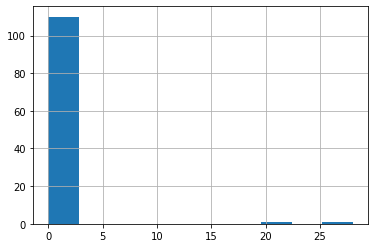

In [14]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count